In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
GTFILE = '/raid/mpsych/CACTAS/DATA/ESUS/7.seg.nrrd'

In [3]:
CUSDATA = '/raid/mpsych/CACTAS/DATA/DACTAS2/'

In [4]:
import nrrd
import cactas as C
import nibabel
import mahotas as mh
from sklearn import metrics

/home/jiehyun.kim001/miniconda3/envs/O/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [5]:
cactas = [137.907, 96.396, 145.458]

In [6]:
slicer = ['6:23:43', '5:43:40', '6:11:44']

In [7]:
slicer2 = []
for s in slicer:
  print(s.split(':'))
  m = s.split(':')[0]
  sec = s.split(':')[1]
  ms = s.split(':')[2]

  v = str(int(m)*60 + int(sec)) + '.' + (ms)
  slicer2.append(v)

['6', '23', '43']
['5', '43', '40']
['6', '11', '44']


In [8]:
slicer2 = [float(v) for v in slicer2]

In [9]:
slicer2

[383.43, 343.4, 371.44]

In [10]:
np.mean(cactas), np.std(cactas)

(126.58699999999999, 21.569681824264354)

In [11]:
np.mean(slicer2), np.std(slicer2)

(366.09, 16.774327606991196)

In [12]:
366.09 / 126.58699999999999

2.892003128283315

In [13]:
import scipy.stats

In [14]:
scipy.stats.ttest_ind(cactas, slicer2)

Ttest_indResult(statistic=-12.395768541746166, pvalue=0.0002434701382914217)

In [15]:
scipy.stats.ttest_ind(cactas, slicer2, equal_var=False)

Ttest_indResult(statistic=-12.395768541746166, pvalue=0.0003410420862363059)

{'whiskers': [<matplotlib.lines.Line2D at 0x7fec1dd2c040>,
 'caps': [<matplotlib.lines.Line2D at 0x7fec1dd2c6a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fec1fd8ed30>,
 'medians': [<matplotlib.lines.Line2D at 0x7fec1dd2cb80>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fec1dd2ce50>,
 'means': []}

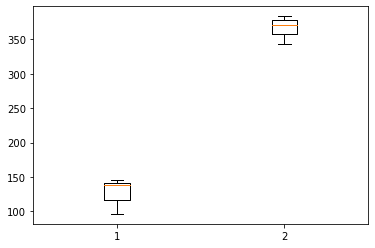

In [16]:
plt.boxplot([cactas, slicer2])

In [17]:
GT = nrrd.read(GTFILE)[0]

In [18]:
CACTAS_INDICES = [1,2,3]
SLICER_INDICES = [4,5,6]

In [19]:
def jaccard(s1, s2):
    a = np.ravel(s1)
    b = np.ravel(s2)
    similarity = metrics.jaccard_score(a, 
                                       b,
                                       average="binary")

    return similarity

def binarize(label, threshold=0):

    label_bin = label.copy().astype(np.bool_)
    label_bin[:] = 0
    label_bin[label > threshold] = 1

    return label_bin

In [20]:
C_JACCARD = []
for c in CACTAS_INDICES:
    segpath = CUSDATA + str(c) + '/07_seg.nii.gz'
    data = nibabel.load(segpath).get_fdata()
    data = binarize(data)
    for i in range(1):
        data = mh.dilate(data)
    jaccard_score = jaccard(binarize(GT), data)
    
    C_JACCARD.append(jaccard_score)

In [19]:
#C_JACCARD

[0.22276422764227644, 0.31270903010033446, 0.1974921630094044]

In [21]:
C_JACCARD # with dilation

[0.4695201037613489, 0.5710526315789474, 0.401219512195122]

In [22]:
np.mean(C_JACCARD), np.std(C_JACCARD)

(0.48059741584513943, 0.0697751256641001)

In [11]:
(0.4695201037613489 + 0.5710526315789474 + 0.401219512195122) / 3

0.48059741584513943

In [23]:
S_JACCARD = []
for c in SLICER_INDICES:
    segpath = CUSDATA + str(c) + '/Segmentation.seg.nrrd'
    data = nrrd.read(segpath)[0]
    #for i in range(1):
    #    data = mh.dilate(data)
    jaccard_score = jaccard(binarize(GT), binarize(data))
    
    S_JACCARD.append(jaccard_score)

In [24]:
S_JACCARD

[0.5471698113207547, 0.5295566502463054, 0.41262135922330095]

In [9]:
(0.5471698113207547 + 0.5295566502463054 + 0.41262135922330095)/3

0.496449273596787

In [25]:
np.mean(S_JACCARD), np.std(S_JACCARD)

(0.496449273596787, 0.05970982767749938)

In [25]:
#S_JACCARD # with dilation

[0.43808777429467083, 0.35570890840652447, 0.3442211055276382]

{'whiskers': [<matplotlib.lines.Line2D at 0x7f01f4b10b80>,
 'caps': [<matplotlib.lines.Line2D at 0x7f01f4b1f040>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f01f4b108b0>,
 'medians': [<matplotlib.lines.Line2D at 0x7f01f4b1f5e0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f01f4b1f8b0>,
 'means': []}

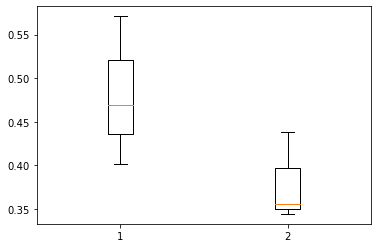

In [28]:
plt.boxplot([C_JACCARD, S_JACCARD])

In [24]:
scipy.stats.ttest_ind(C_JACCARD, S_JACCARD)

Ttest_indResult(statistic=-0.24410838621590547, pvalue=0.8191565531244088)

In [26]:
NASA_C = [6, 72, 7]

In [27]:
NASA_S = [52, 16,32]

In [28]:
np.mean(NASA_C), np.std(NASA_C)

(28.333333333333332, 30.879694874715902)

In [29]:
np.mean(NASA_S), np.std(NASA_S)

(33.333333333333336, 14.72714802291635)

In [30]:
scipy.stats.ttest_ind(NASA_C, NASA_S)

Ttest_indResult(statistic=-0.206685304907864, pvalue=0.8463503122386641)